In [19]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test, x_train = x_test / 255., x_train / 255.
print(y_train[:10], y_test[:10])
training_epochs = 15

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=training_epochs, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=2)

[5 0 4 1 9 2 1 3 1 4] [7 2 1 0 4 1 4 9 5 9]
Epoch 1/15
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3202 - accuracy: 0.9068 - val_loss: 0.1527 - val_accuracy: 0.9570
Epoch 2/15
1500/1500 [==============================] - 14s 10ms/step - loss: 0.1533 - accuracy: 0.9552 - val_loss: 0.1082 - val_accuracy: 0.9703
Epoch 3/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1148 - accuracy: 0.9645 - val_loss: 0.0959 - val_accuracy: 0.9715
Epoch 4/15
1500/1500 [==============================] - 14s 10ms/step - loss: 0.0945 - accuracy: 0.9708 - val_loss: 0.0911 - val_accuracy: 0.9723
Epoch 5/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0794 - accuracy: 0.9749 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 6/15
1500/1500 [==============================] - 15s 10ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0824 - val_accuracy: 0.9754
Epoch 7/15
1500/1500 [==============================] - 14s 9ms/step - loss: 0.059

In [13]:
h = model.fit(x_train, y_train, epochs=1, validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=2)

1500/1500 [==============================] - 17s 11ms/step - loss: 0.0312 - accuracy: 0.9894 - val_loss: 0.0105 - val_accuracy: 0.9966
313/313 - 1s - loss: 0.0761 - accuracy: 0.9823


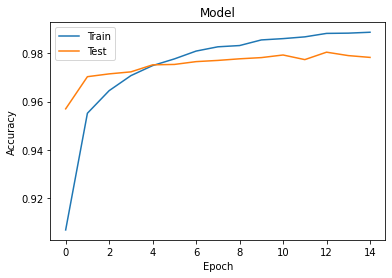

In [20]:
import matplotlib.pyplot as plt
def vis(h, roi):
    plt.plot(h.history[roi])
    plt.plot(h.history["val_"+roi])
    plt.title("Model" + roi)
    plt.xlabel("Epoch")
    plt.ylabel(roi.title())
    plt.legend(["Train", "Test"], loc="upper left")
    plt.show()
vis(h, "accuracy")

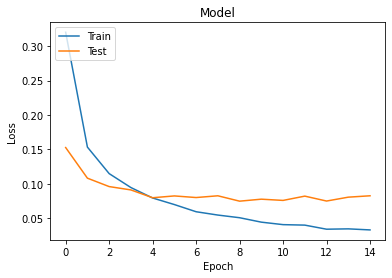

In [21]:
vis(h, "loss")

In [22]:
tf.argmax(model.predict(x_test), 1)

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [24]:
y_test[:]

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:
score[0], score[1] # loss, accuracy

(0.06683700531721115, 0.9805999994277954)